<h1 style='text-align:center;font-weight:bold;color:white'> Pension Planning Analysis</h1>

This project analyzes retirement planning behaviors using the 'PENSION.DTA' dataset. The dataset provides a comprehensive view of individuals' pension participation, financial status, and demographic characteristics.

<br>
Key variables in our analysis include:

- Years in pension plan (pyears)
- Participation in profit-sharing plans (prftshr)
- Investment choice flexibility (choice)
- Demographic factors: gender (female), marital status (married), age, education level (educ), and race (black)
- Financial indicators: family income brackets for 1992 (finc25 to finc101), net worth in 1989 (wealth89)
- Investment behaviors: stock ownership (stckin89), IRA ownership (irain89), and asset allocation (pctstck)
<br>

Our study aims to understand how these factors influence pension plan participation and retirement planning decisions. This analysis will employ various statistical methods to explore the data and identify significant patterns and correlations.

## **Attribute Infromation**

| Attribute | Description |
|-----------|-------------|
| id        | A unique identifier for each family in the dataset. |
| pyears    | The number of years the individual has been in a pension plan. |
| prftshr   | A dummy variable that equals 1 if the individual is part of a profit-sharing plan, and 0 otherwise. |
| choice    | A dummy variable that equals 1 if the individual can choose their investment method, and 0 otherwise. |
| female    | A dummy variable that equals 1 if the individual is female, and 0 if male. |
| married   | A dummy variable that equals 1 if the individual is married, and 0 otherwise. |
| age       | The age of the individual, measured in years. |
| educ      | The highest grade completed by the individual, representing their education level. |
| finc25    | Equals 1 if family income in 1992 was between $15,000 and $25,000, 0 otherwise. |
| finc35    | Equals 1 if family income in 1992 was between $25,000 and $35,000, 0 otherwise. |
| finc50    | Equals 1 if family income in 1992 was between $35,000 and $50,000, 0 otherwise. |
| finc75    | Equals 1 if family income in 1992 was between $50,000 and $75,000, 0 otherwise. |
| finc100   | Equals 1 if family income in 1992 was between $75,000 and $100,000, 0 otherwise. |
| finc101   | Equals 1 if family income in 1992 was over $100,000, 0 otherwise. |
| wealth89  | The net worth of the individual or family in 1989, measured in thousands of dollars. |
| black     | A dummy variable that equals 1 if the individual is Black, and 0 otherwise. |
| stckin89  | A dummy variable that equals 1 if the individual owned stock in 1989, and 0 otherwise. |
| irain89   | A dummy variable that equals 1 if the individual had an Individual Retirement Account (IRA) in 1989, and 0 otherwise. |
| pctstck   | <ul><li><strong>0</strong>: All assets in bonds.</li><li><strong>50</strong>: Mixed allocation of assets.</li><li><strong>100</strong>: All assets in stocks.</li></ul> |


# **Data Understanding**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pension = pd.read_stata('PENSION.DTA')
pension

,id,pyears,prftshr,choice,female,married,age,educ,finc25,finc35,finc50,finc75,finc100,finc101,wealth89,black,stckin89,irain89,pctstck
0,38,1.0,0,1,0,1,64,12,0,0,1,0,0,0,77.900002,0,1,1,0
1,152,6.0,1,1,1,1,56,13,0,0,0,1,0,0,154.899994,0,1,1,50
2,152,25.0,1,1,0,1,56,12,0,0,0,1,0,0,154.899994,0,1,1,50
3,182,20.0,1,0,1,1,63,12,1,0,0,0,0,0,232.500000,0,1,1,100
4,222,35.0,0,1,0,1,67,12,0,1,0,0,0,0,179.000000,0,0,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,4935,3.0,0,1,1,1,57,17,0,0,0,0,1,0,116.000000,0,0,0,100
190,4936,2.0,1,0,1,1,60,9,1,0,0,0,0,0,163.800003,0,0,0,100
191,4964,24.0,0,1,0,1,61,16,0,0,0,0,1,0,246.000000,0,1,1,50
192,5014,29.0,1,0,1,1,58,17,1,0,0,0,0,0,213.000000,0,0,0,100


In [3]:
pension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        194 non-null    int16  
 1   pyears    191 non-null    float64
 2   prftshr   194 non-null    int8   
 3   choice    194 non-null    int8   
 4   female    194 non-null    int8   
 5   married   194 non-null    int8   
 6   age       194 non-null    int8   
 7   educ      194 non-null    int8   
 8   finc25    194 non-null    int8   
 9   finc35    194 non-null    int8   
 10  finc50    194 non-null    int8   
 11  finc75    194 non-null    int8   
 12  finc100   194 non-null    int8   
 13  finc101   194 non-null    int8   
 14  wealth89  194 non-null    float32
 15  black     194 non-null    int8   
 16  stckin89  194 non-null    int8   
 17  irain89   194 non-null    int8   
 18  pctstck   194 non-null    int8   
dtypes: float32(1), float64(1), int16(1), int8(16)
memory usage: 5.8 KB


In [43]:
def inspect_dataset(df):
    print(f'Datasetnya memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.')
    summary = {
        'column_name': df.columns.values.tolist(),
        'n_row': df.shape[0],
        'data_type': df.dtypes.values.tolist(),
        'nan': (df.isnull().sum()),
        'duplicated_pct': (df.duplicated().sum()/len(df)*100).round(2),
        'n_unique': df.nunique().tolist(),
        'sample_value': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [44]:
inspect_dataset(pension)

Datasetnya memiliki 190 baris dan 19 kolom.


,column_name,n_row,data_type,nan,duplicated_pct,n_unique,sample_value
id,id,190,int16,0,0.0,168,"[38, 152, 182, 222, 226, 233, 253, 314, 398, 4..."
pyears,pyears,190,float64,0,0.0,35,"[1.0, 6.0, 25.0, 20.0, 35.0, 13.0, 2.0, 10.0, ..."
prftshr,prftshr,190,int8,0,0.0,2,"[0, 1]"
choice,choice,190,int8,0,0.0,2,"[1, 0]"
female,female,190,int8,0,0.0,2,"[0, 1]"
married,married,190,int8,0,0.0,2,"[1, 0]"
age,age,190,int8,0,0.0,19,"[64, 56, 63, 67, 69, 60, 59, 58, 61, 62, 55, 6..."
educ,educ,190,int8,0,0.0,11,"[12, 13, 11, 14, 16, 18, 17, 8, 15, 9, 10]"
finc25,finc25,190,int8,0,0.0,2,"[0, 1]"
finc35,finc35,190,int8,0,0.0,2,"[0, 1]"


In [7]:
pension.dropna(inplace=True)

In [8]:
pension.drop_duplicates(inplace=True)

In [45]:
categorical_variable = ['female', 'married', 'black', 'prftshr', 'choice', 'stckin89', 'irain89']

In [40]:
print("\nSummary Statistics:")
pd.DataFrame(pension.describe().T)


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
id,190.0,2584.642105,1376.732635,38.0,1580.500000,2512.5,3847.500000,5014.000000
pyears,190.0,11.352632,9.514504,0.0,4.000000,9.0,16.000000,45.000000
prftshr,190.0,0.210526,0.408760,0.0,0.000000,0.0,0.000000,1.000000
choice,190.0,0.610526,0.488919,0.0,0.000000,1.0,1.000000,1.000000
female,190.0,0.605263,0.490085,0.0,0.000000,1.0,1.000000,1.000000
married,190.0,0.752632,0.432623,0.0,1.000000,1.0,1.000000,1.000000
age,190.0,60.531579,4.228469,54.0,57.000000,60.0,64.000000,73.000000
educ,190.0,13.542105,2.577028,8.0,12.000000,12.0,16.000000,18.000000
finc25,190.0,0.210526,0.408760,0.0,0.000000,0.0,0.000000,1.000000
finc35,190.0,0.173684,0.379839,0.0,0.000000,0.0,0.000000,1.000000


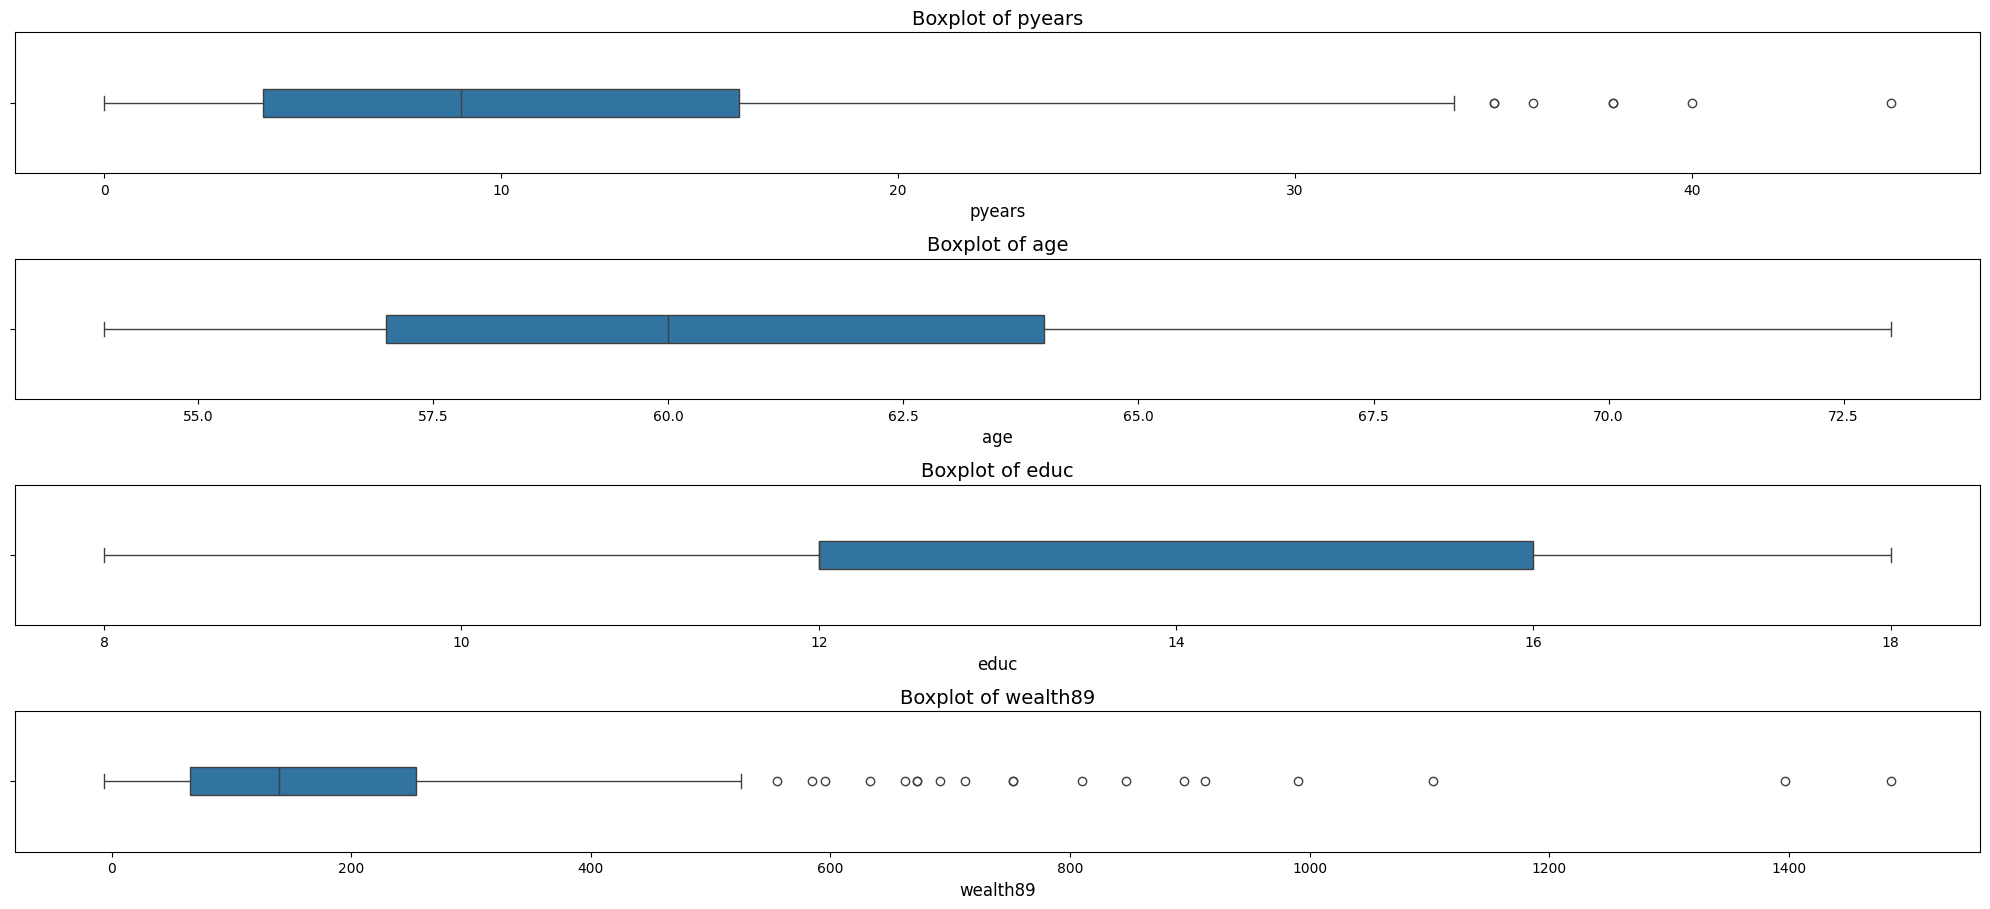

In [77]:
num_cols = ['pyears', 'age', 'educ', 'wealth89']

fig, ax = plt.subplots(4, 1, figsize=(20, 10))  

font_sizes = {
    'title': 16,
    'axes_title': 14,
    'axes_label': 12,
    'xtick_label': 10,
    'ytick_label': 10
}

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=pension, width=0.2, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}', fontsize=font_sizes['axes_title'])
    ax[i].set_xlabel(col, fontsize=font_sizes['axes_label'])
    ax[i].tick_params(axis='x', labelsize=font_sizes['xtick_label'])
    ax[i].tick_params(axis='y', labelsize=font_sizes['ytick_label'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

> **Insight:**

- Outliers are evident in pyears and wealth89. While the outliers in pyears represent individuals with unusually long participation in pension plans, the outliers in wealth89 represent individuals with exceptionally high wealth levels.
- age has a few mild outliers, but they appear to be within a reasonable range for an aging population.
- educ appears to have a balanced distribution without significant outliers

# **EDA**

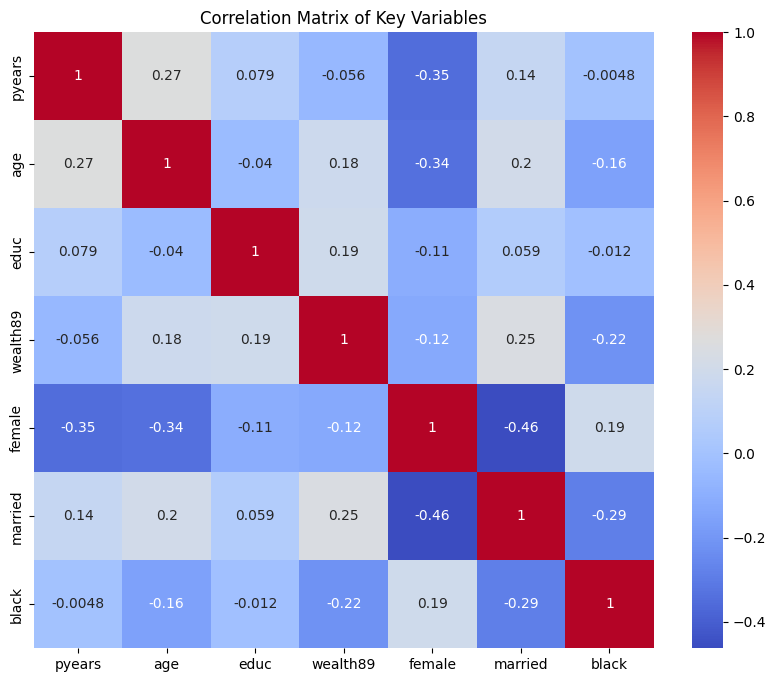

In [46]:
plt.figure(figsize=(10, 8))
corr_variable = ['pyears', 'age', 'educ', 'wealth89', 'female', 'married', 'black']
sns.heatmap(pension[corr_variable].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

> **Insight:**

- The most notable correlations are between pyears and age (0.27), and female with pyears (-0.35). These moderate correlations suggest some meaningful relationships that might warrant further exploration in regression models.
- Most of the other correlations are weak (close to zero), indicating little to no linear relationship between many of the variables. This could imply that the variables are relatively independent or that any relationships are non-linear.

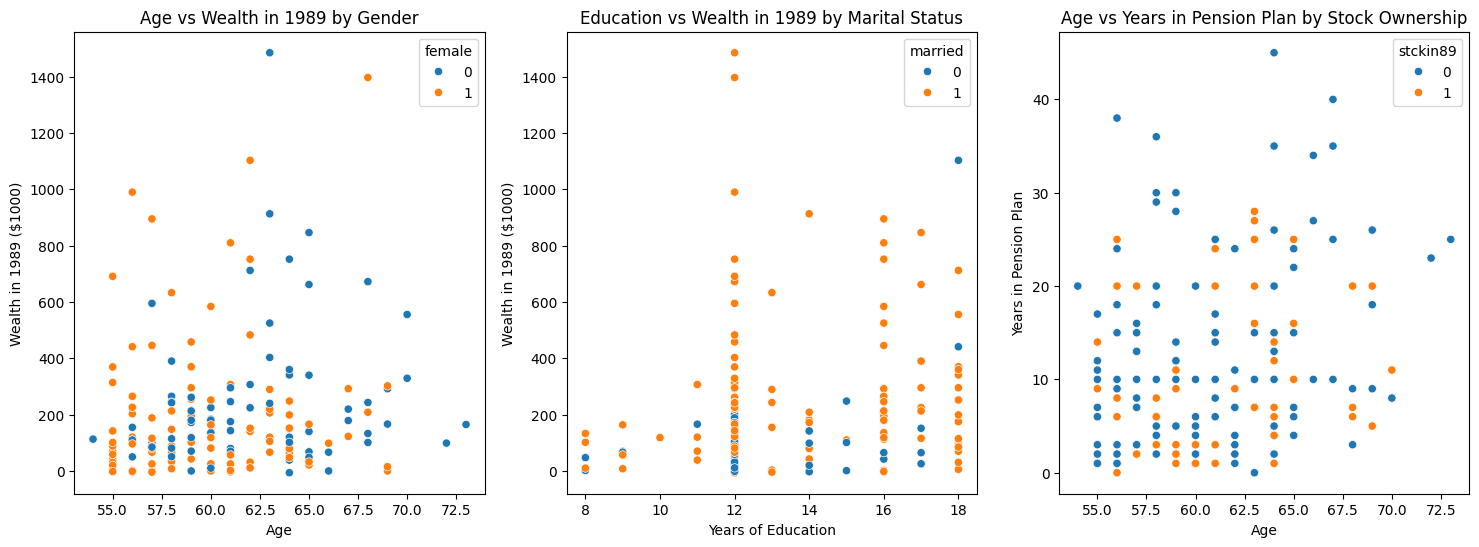

In [57]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=pension, 
                x='age', 
                y='wealth89',
                hue='female', 
                ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Wealth in 1989 ($1000)')
axes[0].set_title('Age vs Wealth in 1989 by Gender')

sns.scatterplot(data=pension, 
                x='educ', 
                y='wealth89', 
                hue='married',
                ax=axes[1])
axes[1].set_xlabel('Years of Education')
axes[1].set_ylabel('Wealth in 1989 ($1000)')
axes[1].set_title('Education vs Wealth in 1989 by Marital Status')

sns.scatterplot(data=pension, 
                x='age', 
                y='pyears', 
                hue='stckin89',
                ax=axes[2])
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Years in Pension Plan')
axes[2].set_title('Age vs Years in Pension Plan by Stock Ownership')

plt.show()

> **Insight:**

- The relationships between age, education, wealth, gender, marital status, and stock ownership are complex and potentially non-linear.
- The data shows variation across different demographic groups, indicating that multiple factors may interact to influence wealth accumulation and retirement planning.

C:\Users\Asus\AppData\Local\Temp\ipykernel_31992\2641720868.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(pension['pyears'], kde=True, palette='mako')


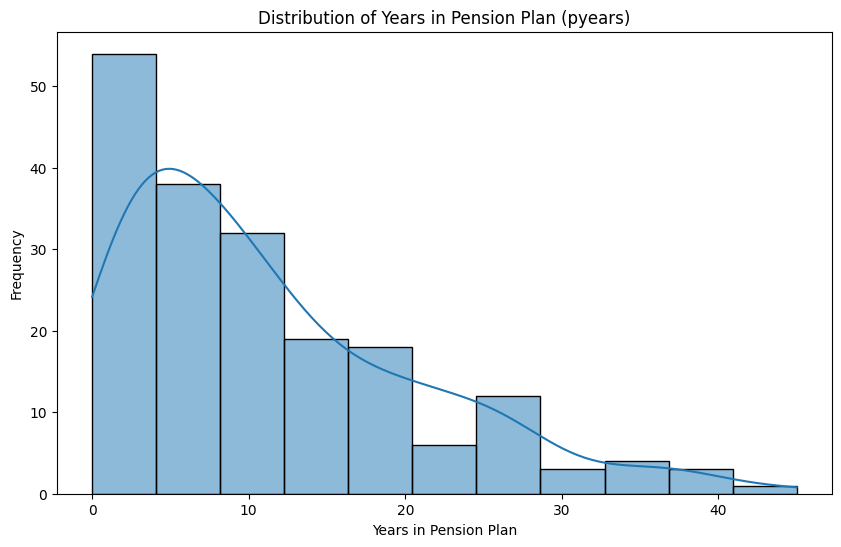

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(pension['pyears'], kde=True, palette='mako')
plt.title('Distribution of Years in Pension Plan (pyears)')
plt.xlabel('Years in Pension Plan')
plt.ylabel('Frequency')
plt.show()

> **Insight:**

- Most individuals have relatively few years in their pension plans. The frequency is highest at the lower end (0 to 5 years) and gradually decreases as the number of years in the pension plan increases.
- The frequency of individuals with more years in pension plans declines steadily. There are very few individuals with more than 20 years in a pension plan, and even fewer with more than 30 or 40 years.

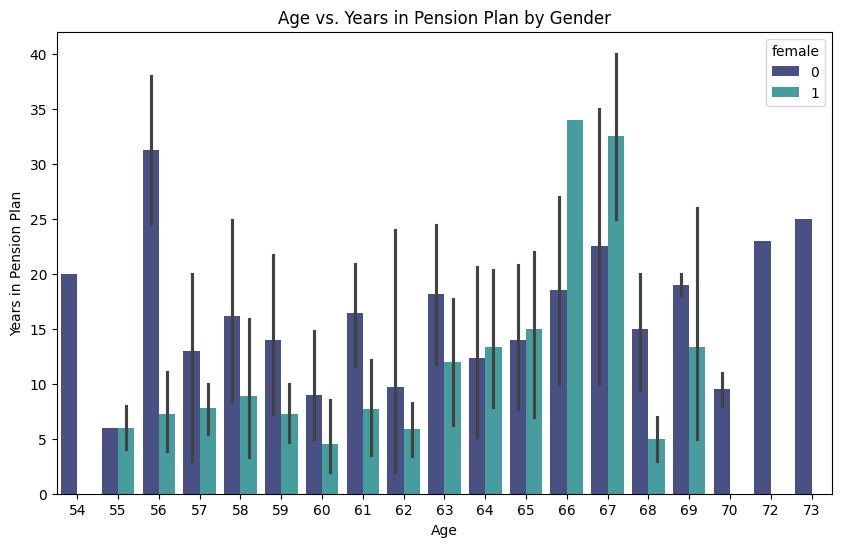

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='pyears', hue='female', data=pension, palette='mako')
plt.title('Age vs. Years in Pension Plan by Gender')
plt.xlabel('Age')
plt.ylabel('Years in Pension Plan')
plt.show()

> **Insight:**

On average, men have more years in pension plans across most age groups, but there are specific age ranges (like age 66) where women seem to have longer participation. This could suggest that certain cohorts of women are more engaged in pension planning or that they joined pension plans earlier in their careers.

C:\Users\Asus\AppData\Local\Temp\ipykernel_31992\1177250833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='educ', y='pyears', data=pension, palette='mako')


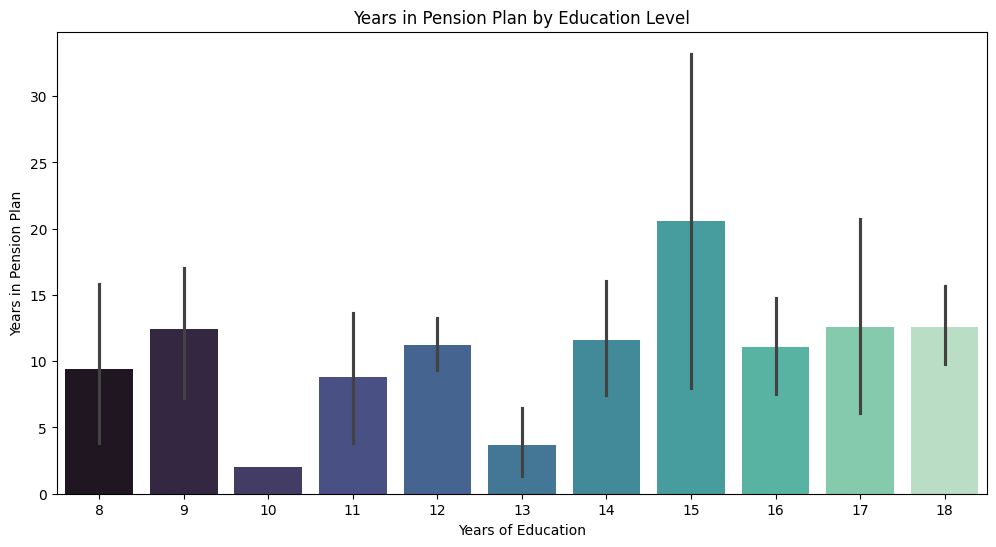

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='educ', y='pyears', data=pension, palette='mako')
plt.title('Years in Pension Plan by Education Level')
plt.xlabel('Years of Education')
plt.ylabel('Years in Pension Plan')
plt.show()

> **Insight:**

- Individuals with approximately 15 years of education tend to have more years in pension plans on average.
- Individuals with 10 and 13 Years of education levels may have shorter pension tenures.
- Thare quite high error (standard deviation) for some education levels, such as 8, 17, and especially 15 years, indicates a high degree of variability within these groups.

In [26]:
X_pyears = pension[['age', 'educ', 'wealth89', 'female', 'married', 'black', 'prftshr', 'choice', 'stckin89', 'irain89', 'pctstck']]
Y_pyears = pension['pyears']

X_pyears = sm.add_constant(X_pyears)

## **Check Multicollinearity**

In [28]:
if 'const' not in X_pyears.columns:
    X_pyears = sm.add_constant(X_pyears)

In [29]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_pyears.columns
vif_data['VIF'] = [variance_inflation_factor(X_pyears.values, i) for i in range(X_pyears.shape[1])]

In [68]:
pd.DataFrame(vif_data)


Variance Inflation Factor (VIF):


,feature,VIF
0,const,329.380720
1,age,1.228400
2,educ,1.076340
3,wealth89,1.296556
4,female,1.446086
5,married,1.416608
6,black,1.205354
7,prftshr,1.135910
8,choice,1.135827
9,stckin89,1.241807


None of the independent variables, except for the constant term, has a VIF above 10. This suggests that multicollinearity is not a major issue in the regression model. We do not need to drop any variables based on VIF values, as all are within acceptable limits.

# **Regression Model**

In [31]:
model_pyears = sm.OLS(Y_pyears, X_pyears).fit()

In [32]:
print(model_pyears.summary())

                            OLS Regression Results                            
Dep. Variable:                 pyears   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     4.846
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           1.57e-06
Time:                        17:47:01   Log-Likelihood:                -672.25
No. Observations:                 190   AIC:                             1368.
Df Residuals:                     178   BIC:                             1407.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4353     11.324     -1.275      0.2

> **Insight:**

- 23% of the variance in pyears is explained by the independent variables in the model.
- Age and education are statistically significant positive predictors of pyears. Older individuals and those with higher education levels tend to have more years in their pension plans.
- Gender (female) is associated with significantly fewer years in a pension plan.
- Variables like wealth89, married, black, prftshr, choice, stckin89, irain89, and pctstck do not significantly predict the number of years in a pension plan in this model.

In [74]:
model_pyears.resid.mean()

np.float64(8.90048269004757e-15)

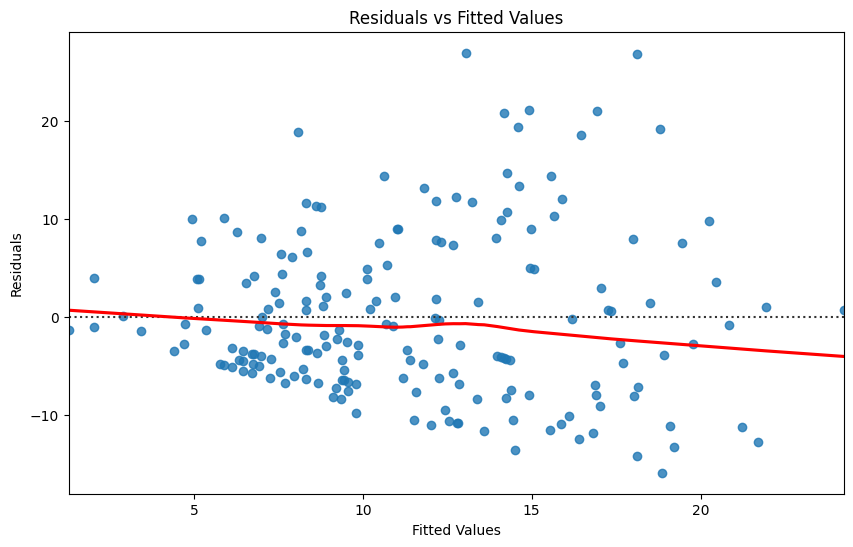

In [69]:
plt.figure(figsize=(10, 6))
sns.residplot(x=model_pyears.fittedvalues, y=model_pyears.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

> **Insight:**

- The residuals appear to be scattered randomly around the horizontal axis (the red line). This suggests that the linearity assumption is reasonably satisfied, there is no clear curvature or trend indicating a non-linear relationship.
- There is a slight funnel shape where the spread of residuals seems to increase as the fitted values increase. This indicates potential heteroscedasticity, the variance of the residuals is not constant across all levels of the fitted values.

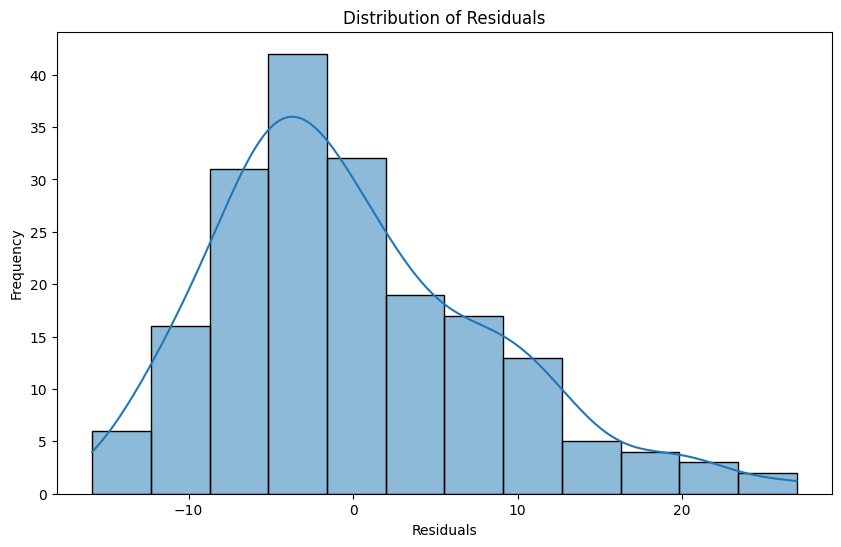

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(model_pyears.resid, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

> **Insight:**

There is a slight skewness to the right, this skewness indicates that there are a few residuals with higher positive values. Although there is a slight right skew, there do not appear to be any extreme outliers.

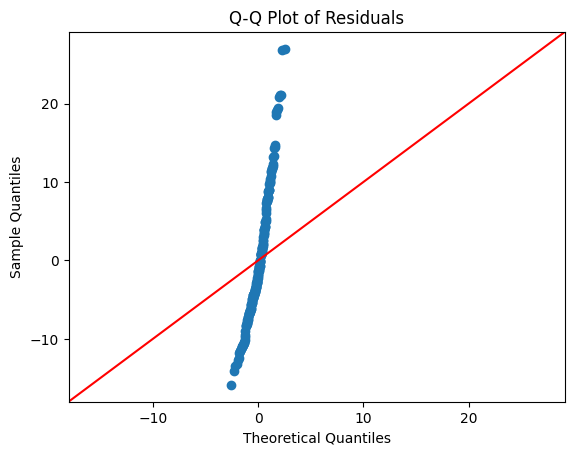

In [71]:
sm.qqplot(model_pyears.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

> **Insight:**

- The residuals do not closely follow the red diagonal line, which represents the expected quantiles if the residuals were perfectly normally distributed. Instead, the points diverge from the line, especially in the upper right and lower left areas of the plot. This deviation suggests that the residuals are not normally distributed.
- The points at the extreme ends of the plot (both in the lower and upper tails) are further away from the diagonal line, which suggests that the residuals have heavier tails than a normal distribution. This indicates that the data may have more extreme values (outliers) than expected under a normal distribution.

## **MANOVA**

In [34]:
manova_model = MANOVA.from_formula('pyears + wealth89 ~ age + educ + wealth89 + female + married + black + prftshr + choice + pctstck', data=pension)
manova_results = manova_model.mv_test()

In [35]:
print(manova_results)


MANOVA Results:
                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------------
              Intercept              Value        Num DF        Den DF        F Value       Pr > F
--------------------------------------------------------------------------------------------------
                 Wilks' lambda       0.9917       2.0000       179.0000        0.7459       0.4758
                Pillai's trace       0.0083       2.0000       179.0000        0.7459       0.4758
        Hotelling-Lawley trace       0.0083       2.0000       179.0000        0.7459       0.4758
           Roy's greatest root       0.0083       2.0000       179.0000        0.7459       0.4758
--------------------------------------------------------------------------------------------
                                             

> **Insight:**

- Age (age) and gender (female) are the only variables with statistically significant effects on the multivariate outcomes. This means that these variables influence the combination of dependent variables jointly.
- Education (educ), wealth in 1989 (wealth89), marital status (married), race (black), profit-sharing plan participation (prftshr), choice in investment (choice), and percentage of assets in stocks (pctstck) do not significantly affect the multivariate outcomes at the 0.05 significance level.